# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Pahrijal Saban mubarok
- **Email:** Kevinsudrajat27@gmail.com
- **ID Dicoding:** pahrijalsm

## Menentukan Pertanyaan Bisnis

- Bagaimana perilaku konsumen terhadap perubahan suhu?
- Bagaimana perilaku konsumen dalam satu hari pada setiap musim?

## Import Semua Packages/Library yang Digunakan

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

## Data Wrangling

### Gathering Data

In [10]:
day_data_df = pd.read_csv('data/day.csv')
day_data_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [11]:
hour_data_df = pd.read_csv('data/hour.csv')
hour_data_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- day_data_df merupakan data bike sharing dalam setiap hari
- hour_data_df merupakan data bike sharing dalam setiap jam

### Assessing Data

In [12]:
day_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [13]:
day_data_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [14]:
day_data_df.duplicated().sum()

0

In [15]:
day_data_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [16]:
hour_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [17]:
hour_data_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [18]:
hour_data_df.duplicated().sum()

0

In [19]:
hour_data_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- hour_data_df memiliki data musim yang masih numerik, dan juga tahun yang belum sesuai.
- day_data_df terdapat data suhu yang sudah di normalisasi, data musim yang masih numerik, dan juga tahun yang belum sesuai.

### Cleaning Data

In [20]:
day_data_df['atemp'] = day_data_df['atemp'].apply(lambda x: x*(50-(-16))+(-16))
day_data_df['atemp'].head()

0    7.999250
1    7.346774
2   -3.499270
3   -1.999948
4   -0.868180
Name: atemp, dtype: float64

In [21]:
day_data_df['yr'] = day_data_df['yr'].map({
    0: '2011',
    1: '2012'
})
day_data_df['yr'].head()

0    2011
1    2011
2    2011
3    2011
4    2011
Name: yr, dtype: object

In [22]:
day_data_df['season'] = day_data_df['season'].map({
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
})
day_data_df['season'].head()

0    spring
1    spring
2    spring
3    spring
4    spring
Name: season, dtype: object

In [23]:
day_data_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,1,0,6,0,2,0.344167,7.999250,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,2011,1,0,0,0,2,0.363478,7.346774,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,2011,1,0,1,1,1,0.196364,-3.499270,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,2011,1,0,2,1,1,0.200000,-1.999948,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,2011,1,0,3,1,1,0.226957,-0.868180,0.436957,0.186900,82,1518,1600


In [24]:
hour_data_df['yr'] = hour_data_df['yr'].map({
    0: '2011',
    1: '2012'
})
hour_data_df['yr'].head()

0    2011
1    2011
2    2011
3    2011
4    2011
Name: yr, dtype: object

In [25]:
hour_data_df['season'] = hour_data_df['season'].map({
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
})
hour_data_df['season'].head()

0    spring
1    spring
2    spring
3    spring
4    spring
Name: season, dtype: object

In [26]:
hour_data_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,spring,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,spring,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,spring,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,spring,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,spring,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- pada hour_data_df data pada musim diubah nilai 1 menjadi spring, 2 menjadi summer, 3 menjadi fall, dan 4 menjadi winter
- pada hour_data_df data tahun diubah dari nilai 0 menjadi 2011 dan 1 menjadi 2012
- pada day_data_df data pada musim diubah nilai 1 menjadi spring, 2 menjadi summer, 3 menjadi fall, dan 4 menjadi winter
- pada day_data_df data tahun diubah dari nilai 0 menjadi 2011 dan 1 menjadi 2012
- pada day_data_df data suhu diubah dari nilai 0 sampai 1 menjadi nilai sesungguhnya yaitu suhu -16 sampai 50 derajat

## Exploratory Data Analysis (EDA)

### Explore ...

In [27]:
day_data_df.groupby(by=["yr", "season"]).agg({
    "cnt": ["max", "min", "mean"]
})

cnt                   
              max   min         mean
yr   season                         
2011 fall    6043  1115  4464.361702
     spring  3239   431  1666.666667
     summer  5805   795  3775.173913
     winter  5511   627  3664.460674
2012 fall    8714  4073  6824.244681
     spring  7836   441  3531.296703
     summer  8362  1027  6209.489130
     winter  8555    22  5791.865169

Pada tabel pivot diatas dapat terlihat konsumen dengan rata-rata per hari paling banyak terdapat pada musim gugur di tahun 2011 maupun di 2012 dan rata-rata per hari paling sedikit terdapat pada musim semi di tahun 2011 maupun di 2012.

In [28]:
hour_data_df.groupby(by=["yr", "season"]).agg({
    "cnt": ["max", "min", "mean"]
})

cnt                
             max min        mean
yr   season                     
2011 fall    651   1  187.343750
     spring  405   1   72.533849
     summer  638   1  157.655924
     winter  625   1  152.828960
2012 fall    977   2  284.343528
     spring  801   1  147.814167
     summer  957   1  258.963282
     winter  967   1  245.698761

Pada tabel pivot diatas dapat terlihat konsumen dengan rata-rata per jam paling banyak terdapat pada musim gugur di tahun 2011 maupun di 2012 dan rata-rata per jam paling sedikit terdapat pada musim semi di tahun 2011 maupun di 2012.

In [29]:
day_data_df.groupby(by=["yr", "season"]).agg({
    "cnt": ["max", "min", "mean"]
})

cnt                   
              max   min         mean
yr   season                         
2011 fall    6043  1115  4464.361702
     spring  3239   431  1666.666667
     summer  5805   795  3775.173913
     winter  5511   627  3664.460674
2012 fall    8714  4073  6824.244681
     spring  7836   441  3531.296703
     summer  8362  1027  6209.489130
     winter  8555    22  5791.865169

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana perilaku konsumen terhadap perubahan suhu?

In [30]:
monthly_cnt = day_data_df.groupby(['yr','mnth'])['cnt'].mean()

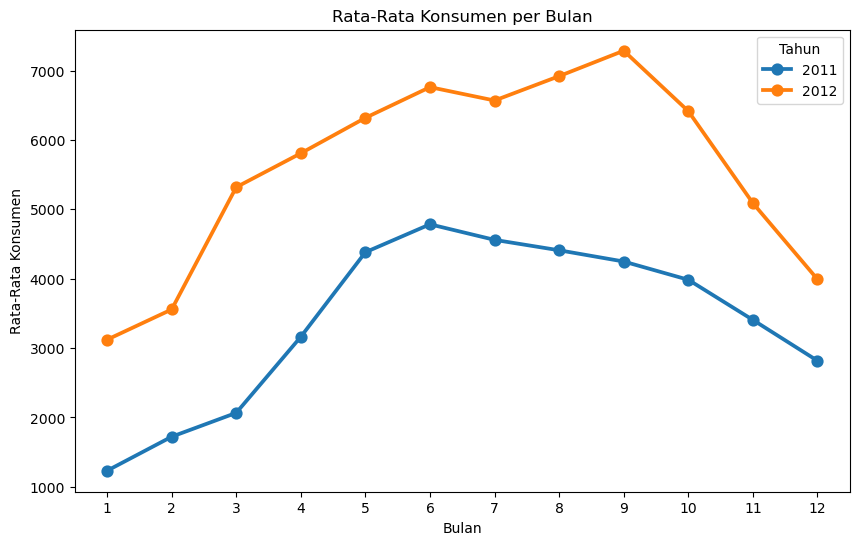

In [31]:
plt.figure(figsize=(10, 6))
sns.pointplot(x=monthly_cnt.index.get_level_values('mnth'), y=monthly_cnt.values, hue=monthly_cnt.index.get_level_values('yr'))
plt.xlabel('Bulan')
plt.ylabel('Rata-Rata Konsumen')
plt.title('Rata-Rata Konsumen per Bulan')
plt.legend(title='Tahun')
plt.show()

In [32]:
monthly_atemp = day_data_df.groupby(['yr','mnth'])['atemp'].mean()

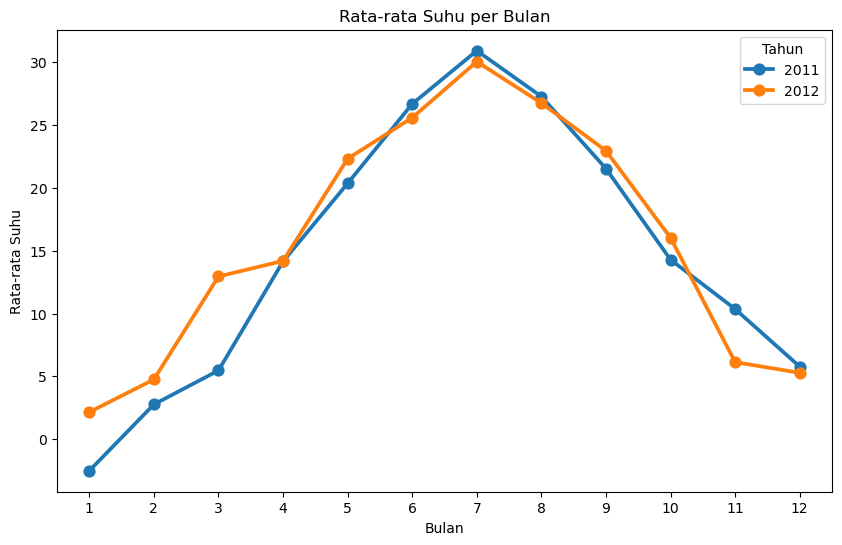

In [33]:
plt.figure(figsize=(10, 6))
sns.pointplot(x=monthly_atemp.index.get_level_values('mnth'), y=monthly_atemp.values, hue=monthly_atemp.index.get_level_values('yr'))
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Suhu')
plt.title('Rata-rata Suhu per Bulan')
plt.legend(title='Tahun')
plt.show()

berdasarkan grafik suhu dan total pengguna sepeda dapat disimpulkan bahwa terdapat tren yang naik pada bulan januari sampai juni tetapi ketika suhu mencapai titik puncak pada bulan juli pengguna sepeda menurun dan tren kembali naik dengan menurunnya suhu di bulan agustus dan september kemudian pengguna kembali ke tren turun pada musim dingin yaitu di bulan oktober sampai desember

### Pertanyaan 2: Bagaimana perilaku konsumen dalam satu hari pada setiap musim?

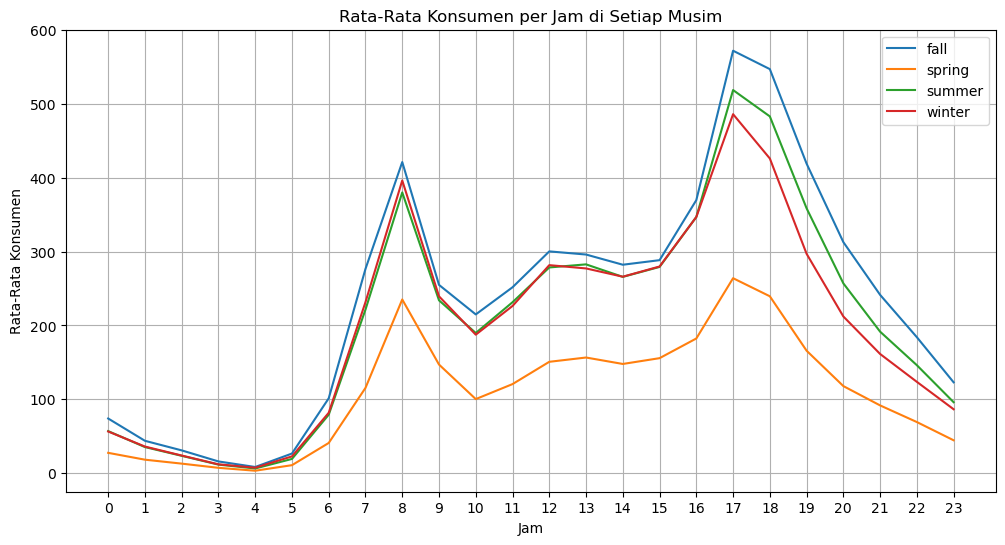

In [34]:
season_hour_cnt = hour_data_df.groupby(['season', 'hr'])['cnt'].mean().unstack()

plt.figure(figsize=(12, 6))
for season in season_hour_cnt.index:
  plt.plot(season_hour_cnt.columns, season_hour_cnt.loc[season], label=season)

plt.xlabel('Jam')
plt.ylabel('Rata-Rata Konsumen')
plt.title('Rata-Rata Konsumen per Jam di Setiap Musim')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.show()


dalam visualisasi diatas dapat dilihat perilaku konsumen untuk setiap musim memiliki tren yang hampir sama tetapi dengan volume yang berbeda. konsumen meningkat signifikan pada jam 6 pagi hingga 8 pagi dan turun hingga jam 10 kemudian perlahan naik dengan puncaknya pada jam 5 sore dan seterusnya turun hingga keesokan harinya

**Insight:**
- indikator suhu menjadi pengaruh penting terhadap perilaku konsumen
- perilaku konsumen relatif sama dalam setiap musim walaupun terdapat perbedaan dalam volume pengunaan

## Analisis Lanjutan (Opsional)

## Conclusion

- Bagaimana perilaku konsumen terhadap perubahan suhu?
Dapat disimpulkan dari analisis diatas terdapat hubungan yang kuat antara suhu dengan banyaknya konsumen dapat dibuktikan dengan suhu yang masih dikatakan tidak terlalu panas masih terdapat kenaikan pengguna sedangkan dengan suhu terlalu panas pengguna juga mengalami penurunan
- Bagaimana perilaku konsumen dalam satu hari pada setiap musim?
Dapat disimpulkan dari analisis diatas pengguna pada setiap musim memiliki perilaku yang relatif sama. Dengan peningkatan yang signifikan pada jam 6 pagi hingga 8 pagi dan turun hingga jam 10 kemudian perlahan naik dengan puncaknya pada jam 5 sore dan seterusnya turun hingga keesokan harinya.


In [35]:
hour_data_df.to_csv("dashboard/hour_data.csv", index=False)
day_data_df.to_csv("dashboard/day_data.csv", index=False)